## Importing packeges

In [2]:
from ising_lib import *
from numpy import *
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
%matplotlib inline

def variance(X):
    return var(X)

def Average(X):
    return average(X)    
    
    
def analyze(temparature,L,E,M):
    u,u_err=jacknife(E,Average)
    mag,mag_err=jacknife(M,Average)
    sp_heat,sp_heat_err=jacknife(E,variance)
    sp_heat/=(temparature*temparature*L)
    sp_heat_err/=(temparature*temparature*L)
    sucep,sucep_err=jacknife(M,variance)
    sucep/=(temparature*L)
    sucep_err/=(temparature*L)
    M2=[i**2 for i in M]
    M4=[i**4 for i in M]
    m2,m2_err=jacknife(M2,Average)
    m4,m4_err=jacknife(M4,Average)
    return [mag,mag_err],[sp_heat,sp_heat_err],[sucep,sucep_err],[m2,m2_err],[m4,m4_err],[u,u_err]


## VERIFICATION FOR ALGOS

### READING FROM FILE TO VERIFY

In [4]:
BASE_FOLDER='../multi_histo_data/'

In [7]:
f=open(BASE_FOLDER+'fnames.txt','r')
fnames1=[]
l=f.readline()
while l:
    fnames1.append(BASE_FOLDER+l[:-1])
    l=f.readline()
f.close()
print(len(fnames1))

5


In [26]:
NUMS=[20,22,24,26,28,30,32]
fnames=[]
for i in NUMS:
    for j in fnames1:
        fnames.append(str(j.replace('32',str(i))).replace('_long',''))

## EXTRACTING FROM MCMC DATA

In [28]:
ml=10000
sampled=[]
analy=dict()
i=-1
extracted_vals=dict()
rslt=open('cppanalysis/mh_result','w')
# cfit=open('cppanalysis/cfit_ising_all_2','w')
rslt.write('Temp,N,mag,mag_err,sp_heat,sp_heat_err,sucep,sucep_err')
rslt.write('M2,M2_err,M4,M4_err,U,U_err \n')
# cfit.write('N,temp,Xi,Xi_err\n')
l=len(fnames)
j=0
for fn in fnames:
    i+=1
    dat=get_data(fn);
    try:
        L=dat['params']['length of lattice  '];
    except:
        L=dat['params']['N '];    
    try:
        T=dat['params']['T   '];
    except:
        T=dat['params']['T '];    
    if T<0.75:
        continue
    j+=1
    print("Doing ",i+1,"(",j,") /",l, " L : ",L," T : ",T,"   ",fn)
    N=L*L
    sdata=sample_data(dat,Max_lags=ml);
    analy=analyze(T,N,sdata['energy'],sdata['magentization'])
    rslt.write(str(T)+","+str(L)+","+str(analy[0][0])+","+str(analy[0][1]))
    rslt.write(","+str(analy[1][0])+","+str(analy[1][1]))
    rslt.write(","+str(analy[2][0])+","+str(analy[2][1]))
    rslt.write(","+str(analy[3][0])+","+str(analy[3][1]))
    rslt.write(","+str(analy[4][0])+","+str(analy[4][1]))
    rslt.write(","+str(analy[5][0])+","+str(analy[5][1])+'\n')
rslt.close()


Doing  1 ( 1 ) / 35  L :  20  T :  2.15     ../multi_histo_data/N20/N_20_T_2.150_ising.datRL.txt
Doing  2 ( 2 ) / 35  L :  20  T :  2.2     ../multi_histo_data/N20/N_20_T_2.200_ising.datRL.txt
Doing  3 ( 3 ) / 35  L :  20  T :  2.25     ../multi_histo_data/N20/N_20_T_2.250_ising.datRL.txt
Doing  4 ( 4 ) / 35  L :  20  T :  2.3     ../multi_histo_data/N20/N_20_T_2.300_ising.datRL.txt
Doing  5 ( 5 ) / 35  L :  20  T :  2.35     ../multi_histo_data/N20/N_20_T_2.350_ising.datRL.txt
Doing  6 ( 6 ) / 35  L :  22  T :  2.15     ../multi_histo_data/N22/N_22_T_2.150_ising.datRL.txt
Doing  7 ( 7 ) / 35  L :  22  T :  2.2     ../multi_histo_data/N22/N_22_T_2.200_ising.datRL.txt
Doing  8 ( 8 ) / 35  L :  22  T :  2.25     ../multi_histo_data/N22/N_22_T_2.250_ising.datRL.txt
Doing  9 ( 9 ) / 35  L :  22  T :  2.3     ../multi_histo_data/N22/N_22_T_2.300_ising.datRL.txt
Doing  10 ( 10 ) / 35  L :  22  T :  2.35     ../multi_histo_data/N22/N_22_T_2.350_ising.datRL.txt
Doing  11 ( 11 ) / 35  L :  24  

## READING THE EXTRACTED DATA FOR ISING

In [29]:
f=open('cppanalysis/mh_result','r')
extracted_vals_ori=dict()
l=f.readline()
l=f.readline()
i=0
while l:
    i+=1
    try:
        it=l[:-1].split(',')
    #         print(it)
        L=int(it[1])
        if L not in extracted_vals_ori.keys():
            extracted_vals_ori.update({L:{'T':[],'mag':[],'mag_err':[],'sp_heat':[],'sp_heat_err':[],
                                      'sucep':[],'sucep_err':[],'m2':[],'m2_err':[],'m4':[],'m4_err':[],
                                       'u':[],'u_err':[]}})
        extracted_vals_ori[L]['T'].append(float(it[0]))
        extracted_vals_ori[L]['mag'].append(float(it[2]))
        extracted_vals_ori[L]['mag_err'].append(float(it[3]))
        extracted_vals_ori[L]['sp_heat'].append(float(it[4]))
        extracted_vals_ori[L]['sp_heat_err'].append(float(it[5]))
        extracted_vals_ori[L]['sucep'].append(float(it[6]))
        extracted_vals_ori[L]['sucep_err'].append(float(it[7]))
        extracted_vals_ori[L]['m2'].append(float(it[8]))
        extracted_vals_ori[L]['m2_err'].append(float(it[9]))
        extracted_vals_ori[L]['m4'].append(float(it[10]))
        extracted_vals_ori[L]['m4_err'].append(float(it[11]))
        extracted_vals_ori[L]['u'].append(float(it[12]))
        extracted_vals_ori[L]['u_err'].append(float(it[13]))
        l=f.readline()
    except:
        print(it)
        l=f.readline()
f.close()
print(i)


35


<Container object of 3 artists>

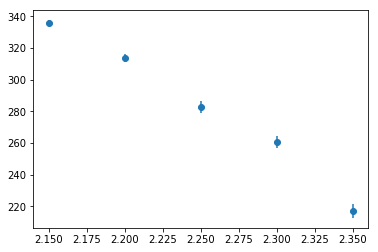

In [32]:
k=20
lbl='mag'
plt.errorbar(extracted_vals_ori[k]['T'],extracted_vals_ori[k][lbl],
             extracted_vals_ori[k][lbl+'_err'],fmt='o')

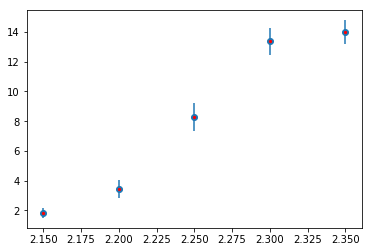

In [33]:
k=26
lbl='sucep'
plt.errorbar(extracted_vals_ori[k]['T'],extracted_vals_ori[k][lbl],
             extracted_vals_ori[k][lbl+'_err'],fmt='o')
lbl1='m2'
lbl2='mag'
lbl3='sucep'
varian=[(i-j*j)/(l*k**2) for i,j,l in zip(extracted_vals_ori[k][lbl1],extracted_vals_ori[k][lbl2],extracted_vals_ori[k]['T']) ]
plt.scatter(extracted_vals_ori[k]['T'],varian,c='r',s=5,zorder=6)

In [36]:
mh_vals=dict()

for L in NUMS:
    f=open('../extracted_data/N'+str(L),'r')
    mh_vals.update({L:{'T':[],'e1':[],'e2':[],'mag':[],'m2':[],'m4':[]}})
    l=f.readline()
    l=f.readline()
    while l:
        i+=1
        try:
            it=l[:-1].split(',')
            mh_vals[L]['T'].append(float(it[0]))
            mh_vals[L]['e1'].append(float(it[1]))
            mh_vals[L]['e2'].append(float(it[2]))
            mh_vals[L]['mag'].append(float(it[3]))
            mh_vals[L]['m2'].append(float(it[4]))
            mh_vals[L]['m4'].append(float(it[5]))
            l=f.readline()
        except:
            print(it)
            l=f.readline()
    f.close()
print(mh_vals.keys())

dict_keys([20, 22, 24, 26, 28, 30, 32])


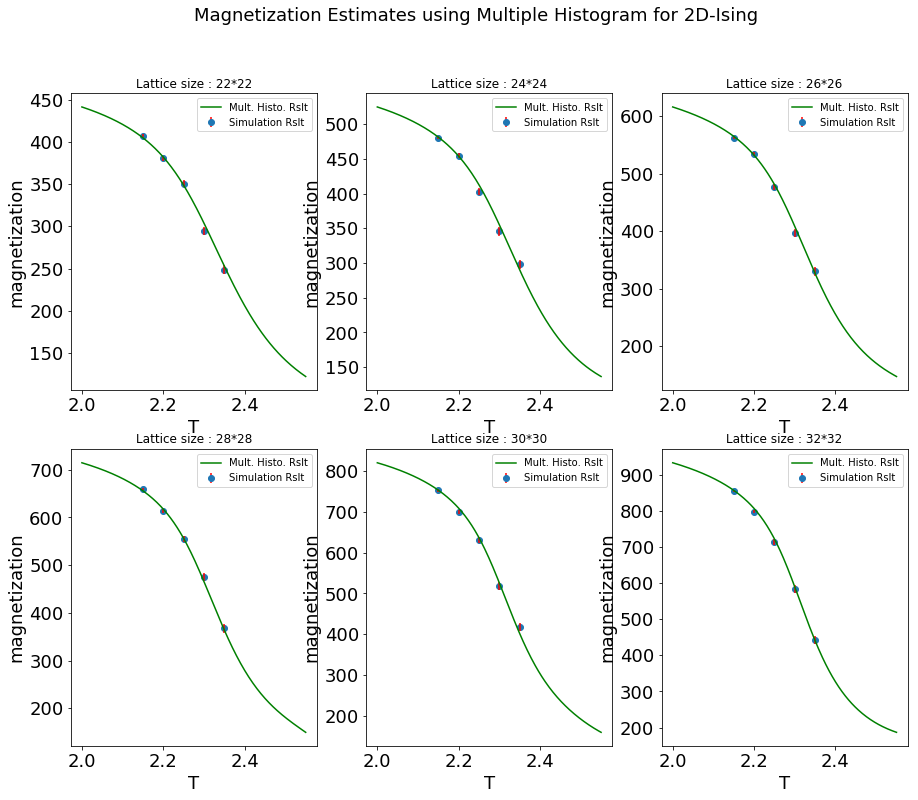

In [156]:
f,ax=plt.subplots(nrows=2,ncols=3,figsize=(15,12))
axs=[i for i in ax[0]]
for i in ax[1]:
    axs.append(i)
    
lbl='mag'
i=0
plt.rcParams.update({'font.size': 10})
for k in extracted_vals_ori.keys():
    if k==20:
        continue
    axs[i].errorbar(extracted_vals_ori[k]['T'],extracted_vals_ori[k][lbl],extracted_vals_ori[k][lbl+"_err"],
                    fmt='o',ecolor='r',barsabove=True,zorder=0,label='Simulation Rslt')
    axs[i].plot(mh_vals[k]['T'],mh_vals[k][lbl],c='g',zorder=1,label='Mult. Histo. Rslt')
    axs[i].set_xlabel('T')
    axs[i].set_ylabel('magnetization')    
    axs[i].set_title('Lattice size : '+str(k)+'*'+str(k))
    axs[i].legend(loc=0)
    i+=1
plt.rcParams.update({'font.size': 15})
f.suptitle('Magnetization Estimates using Multiple Histogram for 2D-Ising')
f.savefig("MagnetizationMH.png")

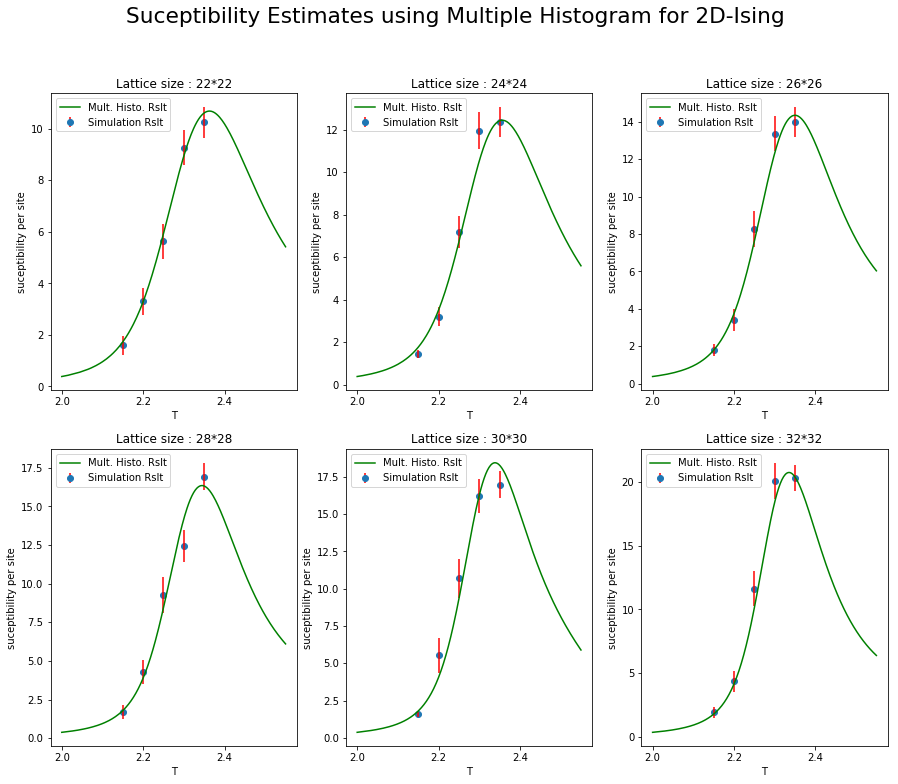

In [155]:
f,ax=plt.subplots(nrows=2,ncols=3,figsize=(15,12))
axs=[i for i in ax[0]]
for i in ax[1]:
    axs.append(i)
    
lbl='sucep'
lbl1='m2'
lbl2='mag'
i=0
plt.rcParams.update({'font.size': 10})
for k in extracted_vals_ori.keys():
    if k==20:
        continue
    axs[i].errorbar(extracted_vals_ori[k]['T'],extracted_vals_ori[k][lbl],extracted_vals_ori[k][lbl+"_err"],
                    fmt='o',ecolor='r',barsabove=True,zorder=0,label='Simulation Rslt')
    
    varian=[(i-j*j)/(l*k**2) for i,j,l in zip(mh_vals[k][lbl1],mh_vals[k][lbl2],mh_vals[k]['T']) ]
    axs[i].plot(mh_vals[k]['T'],varian,c='g',zorder=1,label='Mult. Histo. Rslt')
    axs[i].set_xlabel('T')
    axs[i].set_ylabel('suceptibility per site')    
    axs[i].set_title('Lattice size : '+str(k)+'*'+str(k))
    axs[i].legend(loc=0)
    i+=1

plt.rcParams.update({'font.size': 18})
f.suptitle('Suceptibility Estimates using Multiple Histogram for 2D-Ising')
f.savefig("SuceptibilityMH.png")

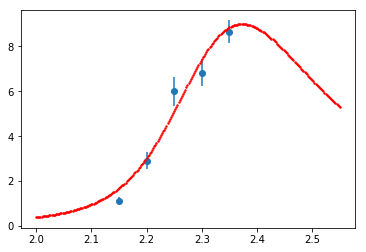

In [40]:
k=20
lbl='sucep'
plt.errorbar(extracted_vals_ori[k]['T'],extracted_vals_ori[k][lbl],
             extracted_vals_ori[k][lbl+'_err'],fmt='o')
lbl1='m2'
lbl2='mag'
varian=[(i-j*j)/(l*k**2) for i,j,l in zip(mh_vals[k][lbl1],mh_vals[k][lbl2],mh_vals[k]['T']) ]
plt.scatter(mh_vals[k]['T'],varian,c='r',s=2,zorder=6)

## Binders Cumulant

In [112]:
m4_m2=dict()
for i in mh_vals.keys():
    temp=[l/m**2 for l,m in zip(mh_vals[i]['m4'],mh_vals[i]['m2'])]
    m4_m2.update({i:{'T':mh_vals[i]['T'],'val':temp}})
    
    

In [118]:
def get_leniar_intersection(x1,y1,x2,y2,X1,Y1,X2,Y2):
    d1=(y2-y1)/(x2-x1)
    d2=(Y2-Y1)/(X2-X1)
#     print("(",x1,y1,")")
#     print("(",x2,y2,")")
#     print("(",X1,Y1,")")
#     print("(",X2,Y2,")")
    return ((Y1-y1) +(d1*x1-d2*X1))/(d1-d2)

In [121]:
Tc=[]
for i in m4_m2.keys():
    for j in m4_m2.keys():
        if i==j:
            continue
        print("for intercection of L = ",i," and L = ",j,end= " : ")
        for l in range(len(m4_m2[i]['val'])-1):
            x=(m4_m2[i]['val'][l]-m4_m2[j]['val'][l])*(m4_m2[i]['val'][l+1]-m4_m2[j]['val'][l+1])
            if x<0:
#                 print("found pairs : ")#,m4_m2[i]['val'][l],m4_m2[j]['val'][l],
#                       m4_m2[i]['val'][l+1],m4_m2[i]['val'][l+1] ," at ",m4_m2[i]['T'][l])
                t=get_leniar_intersection(m4_m2[i]['T'][l],m4_m2[i]['val'][l],
                                                  m4_m2[i]['T'][l+1],m4_m2[i]['val'][l+1],
                                                  m4_m2[j]['T'][l],m4_m2[j]['val'][l],
                                                  m4_m2[j]['T'][l+1],m4_m2[j]['val'][l+1])
                Tc.append(t)
                print(' Tc = ',t)
                break



for intercection of L =  20  and L =  22 :  Tc =  2.2727370044457333
for intercection of L =  20  and L =  24 :  Tc =  2.2745561510391137
for intercection of L =  20  and L =  26 :  Tc =  2.2718704750015637
for intercection of L =  20  and L =  28 :  Tc =  2.272659466382834
for intercection of L =  20  and L =  30 :  Tc =  2.2728939168769626
for intercection of L =  20  and L =  32 :  Tc =  2.2744823741846543
for intercection of L =  22  and L =  20 :  Tc =  2.2727370044457333
for intercection of L =  22  and L =  24 :  Tc =  2.2765185466375653
for intercection of L =  22  and L =  26 :  Tc =  2.271400541599898
for intercection of L =  22  and L =  28 :  Tc =  2.2726326914769945
for intercection of L =  22  and L =  30 :  Tc =  2.2729343221905416
for intercection of L =  22  and L =  32 :  Tc =  2.274838684624635
for intercection of L =  24  and L =  20 :  Tc =  2.2745561510391137
for intercection of L =  24  and L =  22 :  Tc =  2.2765185466375653
for intercection of L =  24  and L = 

In [157]:
jacknife(Tc,average)

(2.2738905536456415, 0.0004856326410549412)

In [125]:
Yc=[]
for i in m4_m2.keys():
    for j in m4_m2.keys():
        if i==j:
            continue
        print("for intercection of L = ",i," and L = ",j,end= " : ")
        for l in range(len(m4_m2[i]['val'])-1):
            x=(m4_m2[i]['val'][l]-m4_m2[j]['val'][l])*(m4_m2[i]['val'][l+1]-m4_m2[j]['val'][l+1])
            if x<0:
#                 print("found pairs : ")#,m4_m2[i]['val'][l],m4_m2[j]['val'][l],
#                       m4_m2[i]['val'][l+1],m4_m2[i]['val'][l+1] ," at ",m4_m2[i]['T'][l])
                t=get_leniar_intersection(m4_m2[i]['val'][l],m4_m2[i]['T'][l],
                                          m4_m2[i]['val'][l+1],m4_m2[i]['T'][l+1],
                                          m4_m2[j]['val'][l],m4_m2[j]['T'][l],
                                          m4_m2[j]['val'][l+1],m4_m2[j]['T'][l+1])
                Yc.append(t)
                print( i,j ,'Y = ',t)
                break



for intercection of L =  20  and L =  22 : 20 22 Y =  1.172453866306208
for intercection of L =  20  and L =  24 : 20 24 Y =  1.1762929668237139
for intercection of L =  20  and L =  26 : 20 26 Y =  1.1706421408154302
for intercection of L =  20  and L =  28 : 20 28 Y =  1.1722912579554408
for intercection of L =  20  and L =  30 : 20 30 Y =  1.1727829340015081
for intercection of L =  20  and L =  32 : 20 32 Y =  1.1761350504077597
for intercection of L =  22  and L =  20 : 22 20 Y =  1.172453866306208
for intercection of L =  22  and L =  24 : 22 24 Y =  1.181375507912563
for intercection of L =  22  and L =  26 : 22 26 Y =  1.1693905399106943
for intercection of L =  22  and L =  28 : 22 28 Y =  1.1722123856032616
for intercection of L =  22  and L =  30 : 22 30 Y =  1.1729106496601358
for intercection of L =  22  and L =  32 : 22 32 Y =  1.177365826962129
for intercection of L =  24  and L =  20 : 24 20 Y =  1.1762929668237139
for intercection of L =  24  and L =  22 : 24 22 Y =  1

In [158]:
jacknife(Yc,average)

(1.1759137567433402, 0.0014635918890448794)

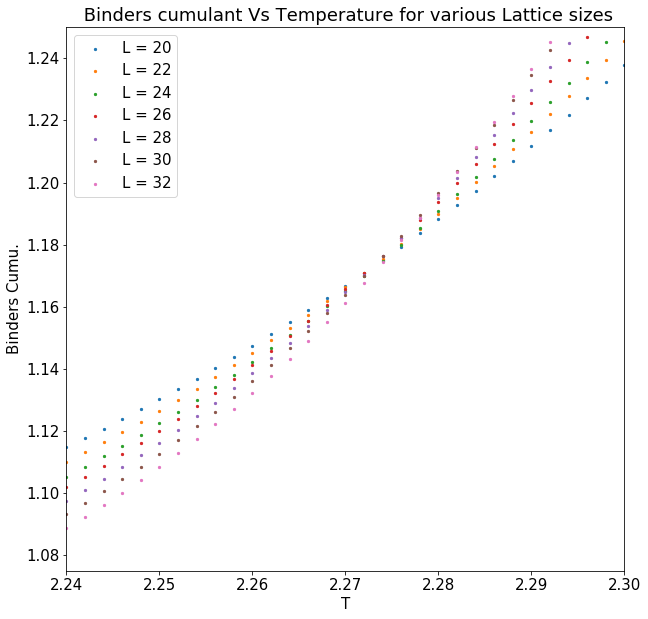

In [148]:
plt.figure(figsize=(10,10))

plt.rcParams.update({'font.size': 15})
for i in m4_m2.keys():
    plt.scatter(m4_m2[i]['T'],m4_m2[i]['val'],s=5,label="L = "+str(i))
plt.xlim([2.24,2.30])
plt.ylim([1.075,1.25])
plt.xlabel("T")
plt.ylabel("Binders Cumu.")
plt.legend(loc=0)
plt.title(" Binders cumulant Vs Temperature for various Lattice sizes")
plt.savefig("BCumulant.png")

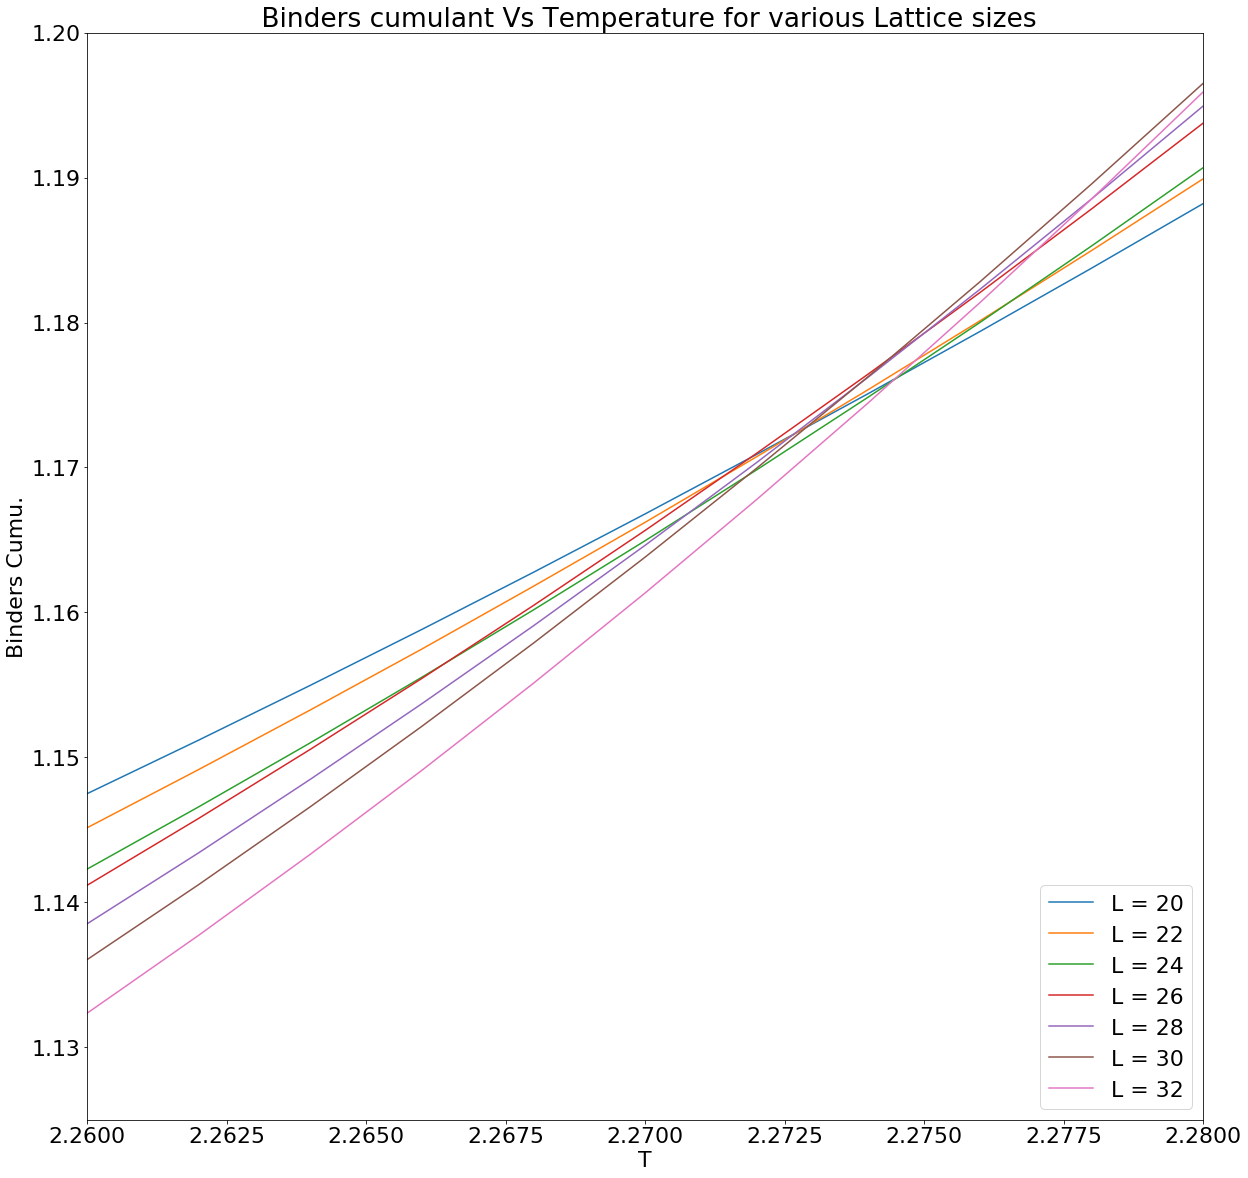

In [146]:
plt.figure(figsize=(20,20))

plt.rcParams.update({'font.size': 22})
for i in m4_m2.keys():
    plt.plot(m4_m2[i]['T'],m4_m2[i]['val'],label="L = "+str(i))
plt.xlim([2.26,2.28])
plt.ylim([1.125,1.20])
plt.xlabel("T")
plt.ylabel("Binders Cumu.")
plt.legend(loc=0)
plt.title(" Binders cumulant Vs Temperature for various Lattice sizes")
plt.savefig('BCumulant_magnified.png')

## MAKE CONFIG

In [89]:
BASE_FOLDER='../multi_histo_data/'

In [90]:
f=open(BASE_FOLDER+'fnames.txt','r')
fnames=[]
l=f.readline()
while(l):
    fnames.append(l[:-1])
    l=f.readline()
f.close()
print(len(fnames))

4


In [91]:
Max_lags=9000
fit_count_of_acf=Max_lags
tol=0.5
f=open(BASE_FOLDER+'hist.config','w')
for nme in fnames:
    data=get_data(BASE_FOLDER+nme)
    tau,err,status=get_correlation_values(data['time'][-Max_lags:],data['energy'][-Max_lags:],
                            data['magentization'][-Max_lags:],Max_lags,fit_count_of_acf,tol)
    print(nme," -> ",tau," , ",err," , ",status)
    f.write(nme[:-6]+","+str(tau)+","+str(err)+","+str(status).lower()+'\n')
f.close()   

N32_long/N_32_T_2.100_ising.datRL.txt  ->  2  ,  0.022375716825948765  ,  True
N32_long/N_32_T_2.200_ising.datRL.txt  ->  3  ,  0.03890471577221767  ,  True
N32_long/N_32_T_2.300_ising.datRL.txt  ->  5  ,  0.08799413393271968  ,  True
N32_long/N_32_T_2.400_ising.datRL.txt  ->  10  ,  0.20771395158400566  ,  True
